# 
In here we use machine learning algorithms to analyze and cluster unlabeled datasets. These algorithms discover hidden patterns 
or data groupings without the need for human intervention. Its ability to discover similarities and differences in information 
make it the ideal solution for exploratory data analysis, cross-selling strategies, customer segmentation,and image recognition.

Unsupervised learning models are utilized for three main tasks—clustering, association, and dimensionality reduction.

-- Clustering is a data mining technique which groups unlabeled data based on their similarities or differences. Clustering 
algorithms are used to process raw, unclassified data objects into groups represented by structures or patterns in the 
information. Clustering algorithms can be categorized into a few types, specifically exclusive, overlapping, hierarchical, and 
probabilistic.

* Exclusive clustering is a form of grouping that stipulates a data point can exist only in one cluster. This can also be 
referred to as “hard” clustering. The K-means clustering algorithm is an example of exclusive clustering.

K-means clustering is a common example of an exclusive clustering method where data points are assigned into K groups, where 
K represents the number of clusters based on the distance from each group’s centroid. The data points closest to a given 
centroid will be clustered under the same category. A larger K value will be indicative of smaller groupings with more 
granularity whereas a smaller K value will have larger groupings and less granularity. K-means clustering is commonly used in 
market segmentation, document clustering, image segmentation, and image compression.

* Overlapping clusters differs from exclusive clustering in that it allows data points to belong to multiple clusters with 
separate degrees of membership. “Soft” or fuzzy k-means clustering and GMM is an example of overlapping clustering.

* Hierarchical clustering, also known as hierarchical cluster analysis (HCA), is an unsupervised clustering algorithm that can 
be categorized in two ways; they can be agglomerative or divisive.

Agglomerative clustering is considered a “bottoms-up approach.” Its data points are isolated as separate groupings initially, 
and then they are merged together iteratively on the basis of similarity until one cluster has been achieved.

Divisive clustering can be defined as the opposite of agglomerative clustering; instead it takes a “top-down” approach. In this 
case, a single data cluster is divided based on the differences between data points. Divisive clustering is not commonly used, 
but it is still worth noting in the context of hierarchical clustering. 

Euclidean distance is the most common metric used to calculate these distances; however, other metrics, such as Manhattan 
distance, are also cited in clustering literature. These clustering processes are usually visualized using a dendrogram, a 
tree-like diagram that documents the merging or splitting of data points at each iteration.

* A probabilistic model is an unsupervised technique that helps us solve density estimation or “soft” clustering problems. 
In probabilistic clustering, data points are clustered based on the likelihood that they belong to a particular distribution. 
The Gaussian Mixture Model (GMM) is the one of the most commonly used probabilistic clustering methods.

Gaussian Mixture Models(soft clustering) are classified as mixture models, which means that they are made up of an unspecified 
number of probability distribution functions. GMMs are primarily leveraged to determine which Gaussian, or normal, probability 
distribution a given data point belongs to. If the mean or variance are known, then we can determine which distribution a given 
data point belongs to. However, in GMMs, these variables are not known, so we assume that a latent, or hidden, variable exists 
to cluster data points appropriately. While it is not required to use the Expectation-Maximization (EM) algorithm, it is a 
commonly used to estimate the assignment probabilities for a given data point to a particular data cluster.


In [1]:
import pandas as pd
data = pd.read_csv('Clustering_gmm.csv')

In [2]:
data.describe()

,Weight,Height
count,500.000000,500.000000
mean,61.270240,169.515781
std,5.196976,4.805095
min,50.433644,160.182164
25%,57.772791,166.607599
50%,61.961518,169.726252
75%,65.439332,172.837284
max,70.700456,178.894770


In [12]:
data

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679
...,...,...
495,59.976983,169.679741
496,66.423814,174.625574
497,53.604698,161.919208
498,50.433644,160.794875


In [4]:
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

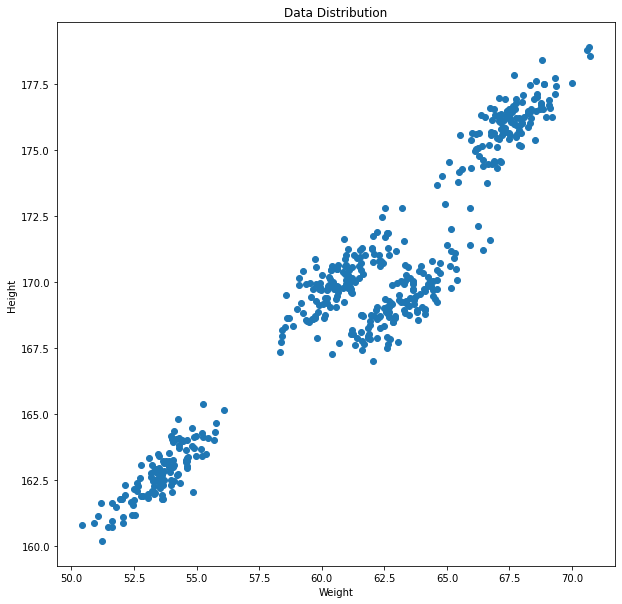

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(data["Weight"],data["Height"])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Data Distribution')
plt.show()

# k-means model

In [13]:
from sklearn.cluster import KMeans

In [14]:
kmeans = KMeans(n_clusters=10, random_state=100)

In [15]:
kmeans

KMeans(n_clusters=10, random_state=100)

In [16]:
kmeans.fit(data)

KMeans(n_clusters=10, random_state=100)

In [17]:
pred = kmeans.predict(data)

In [18]:
pred

array([5, 9, 3, 7, 0, 2, 6, 3, 3, 8, 2, 9, 6, 8, 3, 7, 5, 7, 8, 7, 7, 9,
       6, 8, 7, 1, 9, 2, 1, 2, 6, 6, 9, 6, 2, 9, 8, 3, 8, 5, 4, 3, 7, 9,
       6, 5, 3, 3, 5, 5, 8, 8, 6, 3, 7, 6, 6, 8, 1, 5, 5, 1, 5, 5, 9, 2,
       7, 5, 7, 6, 4, 3, 4, 5, 4, 9, 6, 6, 3, 3, 8, 3, 8, 3, 7, 6, 8, 1,
       0, 8, 8, 1, 5, 8, 7, 3, 5, 9, 5, 3, 4, 1, 0, 1, 7, 7, 2, 5, 3, 1,
       8, 2, 8, 1, 5, 8, 5, 7, 6, 5, 3, 8, 0, 5, 8, 5, 5, 5, 5, 1, 7, 8,
       6, 8, 1, 8, 3, 9, 3, 6, 9, 5, 0, 5, 2, 8, 3, 3, 6, 8, 1, 5, 7, 3,
       7, 6, 2, 5, 2, 7, 5, 3, 0, 0, 6, 6, 9, 3, 8, 6, 9, 8, 5, 6, 3, 4,
       3, 4, 4, 8, 9, 5, 0, 7, 2, 1, 2, 5, 6, 1, 5, 2, 4, 2, 6, 4, 3, 2,
       7, 1, 1, 7, 2, 6, 7, 6, 6, 7, 2, 0, 2, 5, 0, 0, 7, 9, 6, 8, 1, 8,
       3, 5, 6, 8, 6, 0, 1, 7, 1, 2, 6, 2, 2, 6, 7, 3, 7, 6, 8, 5, 0, 6,
       2, 9, 8, 1, 7, 5, 3, 3, 3, 6, 5, 4, 7, 1, 8, 6, 1, 2, 3, 7, 5, 4,
       5, 0, 3, 3, 8, 9, 3, 8, 5, 2, 5, 4, 2, 2, 7, 5, 0, 7, 5, 2, 5, 7,
       6, 5, 7, 3, 3, 5, 4, 8, 5, 4, 4, 8, 7, 0, 9,

In [19]:
frame = pd.DataFrame(data)
frame['cluster'] = pred

In [43]:
frame

,Weight,Height,cluster
0,67.062924,176.086355,5
1,68.804094,178.388669,9
2,60.930863,170.284496,3
3,59.733843,168.691992,7
4,65.431230,173.763679,0
...,...,...,...
495,59.976983,169.679741,7
496,66.423814,174.625574,0
497,53.604698,161.919208,8
498,50.433644,160.794875,4


In [22]:
frame.columns = ['Weight', 'Height', 'cluster']

In [23]:
frame

,Weight,Height,cluster
0,67.062924,176.086355,5
1,68.804094,178.388669,9
2,60.930863,170.284496,3
3,59.733843,168.691992,7
4,65.431230,173.763679,0
...,...,...,...
495,59.976983,169.679741,7
496,66.423814,174.625574,0
497,53.604698,161.919208,8
498,50.433644,160.794875,4


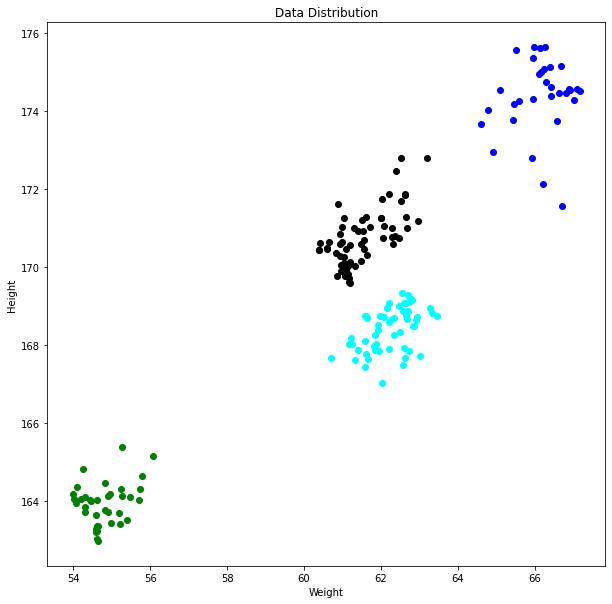

In [26]:
# just doing for 4 clusters not for ten.
plt.figure(figsize=(10,10))
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Data Distribution')
color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"],c=color[k])
plt.show()

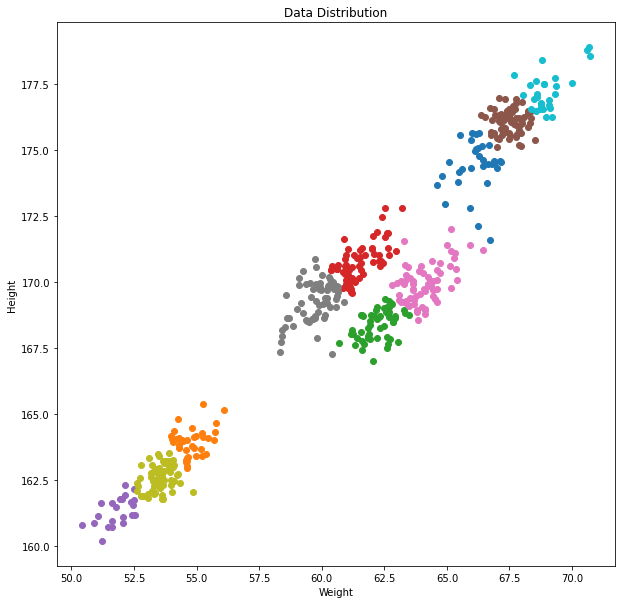

In [25]:
# for all 10 clusters.
plt.figure(figsize=(10,10))
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Data Distribution')
for k in range(0,10):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"])
plt.show()

In [9]:
clusters = kmeans.fit_predict(data)

In [10]:
kmeans.cluster_centers_.shape

(10, 2)

In [11]:
clusters

array([5, 9, 3, 7, 0, 2, 6, 3, 3, 8, 2, 9, 6, 8, 3, 7, 5, 7, 8, 7, 7, 9,
       6, 8, 7, 1, 9, 2, 1, 2, 6, 6, 9, 6, 2, 9, 8, 3, 8, 5, 4, 3, 7, 9,
       6, 5, 3, 3, 5, 5, 8, 8, 6, 3, 7, 6, 6, 8, 1, 5, 5, 1, 5, 5, 9, 2,
       7, 5, 7, 6, 4, 3, 4, 5, 4, 9, 6, 6, 3, 3, 8, 3, 8, 3, 7, 6, 8, 1,
       0, 8, 8, 1, 5, 8, 7, 3, 5, 9, 5, 3, 4, 1, 0, 1, 7, 7, 2, 5, 3, 1,
       8, 2, 8, 1, 5, 8, 5, 7, 6, 5, 3, 8, 0, 5, 8, 5, 5, 5, 5, 1, 7, 8,
       6, 8, 1, 8, 3, 9, 3, 6, 9, 5, 0, 5, 2, 8, 3, 3, 6, 8, 1, 5, 7, 3,
       7, 6, 2, 5, 2, 7, 5, 3, 0, 0, 6, 6, 9, 3, 8, 6, 9, 8, 5, 6, 3, 4,
       3, 4, 4, 8, 9, 5, 0, 7, 2, 1, 2, 5, 6, 1, 5, 2, 4, 2, 6, 4, 3, 2,
       7, 1, 1, 7, 2, 6, 7, 6, 6, 7, 2, 0, 2, 5, 0, 0, 7, 9, 6, 8, 1, 8,
       3, 5, 6, 8, 6, 0, 1, 7, 1, 2, 6, 2, 2, 6, 7, 3, 7, 6, 8, 5, 0, 6,
       2, 9, 8, 1, 7, 5, 3, 3, 3, 6, 5, 4, 7, 1, 8, 6, 1, 2, 3, 7, 5, 4,
       5, 0, 3, 3, 8, 9, 3, 8, 5, 2, 5, 4, 2, 2, 7, 5, 0, 7, 5, 2, 5, 7,
       6, 5, 7, 3, 3, 5, 4, 8, 5, 4, 4, 8, 7, 0, 9,

# Gaussian Mixture Model

In [27]:
from sklearn.mixture import GaussianMixture

In [36]:
gmm = GaussianMixture(n_components=4,random_state=100)

In [37]:

gmm

GaussianMixture(n_components=4, random_state=100)

In [29]:
#clusters1 = gmm.fit_predict(data)

In [31]:
#clusters1

array([2, 1, 0, 2, 0, 3, 0, 2, 0, 2, 1, 1, 2, 0, 1, 1, 1, 0, 2, 1, 0, 2,
       2, 2, 2, 0, 0, 2, 0, 0, 2, 3, 2, 1, 2, 1, 1, 1, 2, 0, 0, 0, 2, 2,
       1, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 2, 2, 0], dtype=int64)

In [38]:
gmm.fit(data)

GaussianMixture(n_components=4, random_state=100)

In [39]:
labels = gmm.predict(data)

In [51]:
labels

array([2, 1, 0, 2, 0, 3, 0, 2, 0, 2, 1, 1, 2, 0, 1, 1, 1, 0, 2, 1, 0, 2,
       2, 2, 2, 0, 0, 2, 0, 0, 2, 3, 2, 1, 2, 1, 1, 1, 2, 0, 0, 0, 2, 2,
       1, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 2, 2, 0], dtype=int64)

In [41]:
frame1 = pd.DataFrame(data)
frame1['cluster'] = labels

In [42]:
frame1

,Weight,Height,cluster
2,60.930863,170.284496,2
7,61.041643,170.096682,1
8,62.633623,171.862972,0
14,60.659373,170.647659,2
37,62.286009,170.774430,0
...,...,...,...
434,62.650662,171.290617,0
439,60.846486,169.768519,1
446,61.517099,171.201389,2
474,60.404460,170.613083,2


In [ ]:
# frame.columns = ['Weight', 'Height', 'cluster']

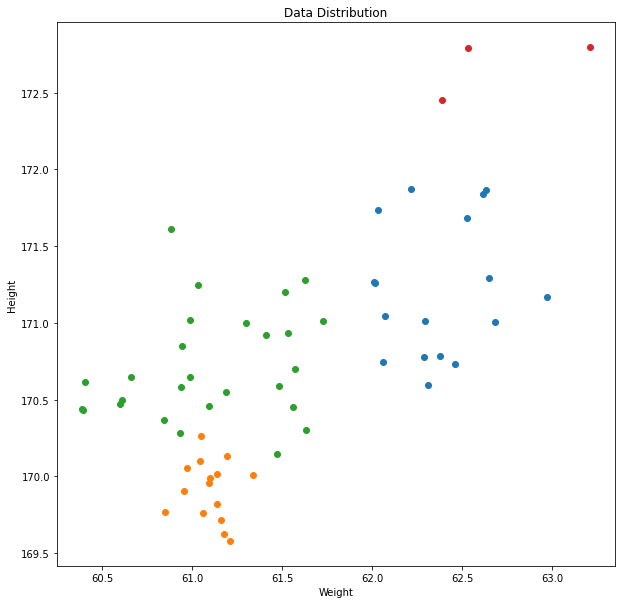

In [60]:
plt.figure(figsize=(10,10))
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Data Distribution')
for k in range(0,4):
    data = frame1[frame1["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"])
plt.show()